<center><h2>Deep Q Learning vs Classical Q Learning</h2></center>


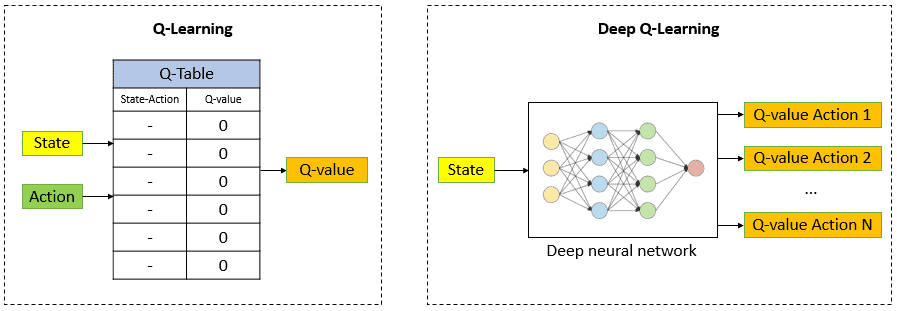<br>
Source of image:<br>
https://www.baeldung.com/cs/q-learning-vs-deep-q-learning-vs-deep-q-network

**Classical Q learning**: what I learned from first assignment and the second assignment: in classical Q learning, the agent learns directly from Q function by storing the Q values in table which is called Q table.<br> This table has rows and columns, where each row shows the state and each column shows the action. The learning process iteratively updates the Q values in the table based on the agent's experience in the environment.<br>
But there is a problem with classical Q learning, the Q table needs one cell for each state action pair. <br> In a simple 5x5 grid world, there are 25 states. But, in a 100x100 grid, there are 10,000 states, this can make the table huge. This means: More places = more rows x more choice = more columns.<br>
In a continuous state space, we must divide continuous numbers into small bins to fit them into a table.<bt> I did this in my second assignment, multiplied the bins for each variable, this makes huge table. The agent must visit all these cells to learn, which makes the learning very slow.<br>
**Sources**: <br>
https://wandb.ai/cosmo3769/Q-Learning/reports/What-is-Q-Learning---Vmlldzo1NTI1NzE0<br>
https://www.byteplus.com/en/topic/514148?title=q-learning-vs-deep-q-learning-vs-deep-q-network-a-comprehensive-guide-to-reinforcement-learning-algorithms

**Deep Q Learning**: DQN replaces the Q table with a deep neural network, instead of looking up values in a table. The network takes the current state as input, the output is all possible actions in that state.<br><br>
**How the Network works**:<br><br>
**In a video game**, the network uses conventional layers to process raw pixels. These layers detect edges, shapes, and objects. In a Cloud Based ML course, in the second assignment I worked with CNN. The agent learns directly from the screen. In the classic Atari DQN, the input is four stacked 84 × 84 grey frames, three conventional layers squeeze those 28  224 pixels into a compact feature map that a final dense layer turns into Q values for each move. CNN layers need far fewer weights than a fully connected layer that would connect every pixel to every neuron.
**Small numeric vectors (CartPole state)**:<br>
**In the CartPole environment**, the observation is just four numbers: cart position, cart velocity, pole angle, and pole tip velocity.<br>
Since the input is a small, dense layers are sufficient. These layers learn combinations: pole is leaning left and moving fast,<br> then the final layer outputs the two Q‑values: push cart left or right.<br>
**Sources**:<br>
https://milvus.io/ai-quick-reference/what-is-deep-qnetwork-dqn<br>
https://medium.com/data-science/reinforcement-learning-concept-on-cart-pole-with-dqn-799105ca670<br>
https://www.byteplus.com/en/topic/514148?title=q-learning-vs-deep-q-learning-vs-deep-q-network-a-comprehensive-guide-to-reinforcement-learning-algorithms


<center><h3>Differences Between Q-Learning, Deep Q-Learning, and Deep Q-Network</h3></center>

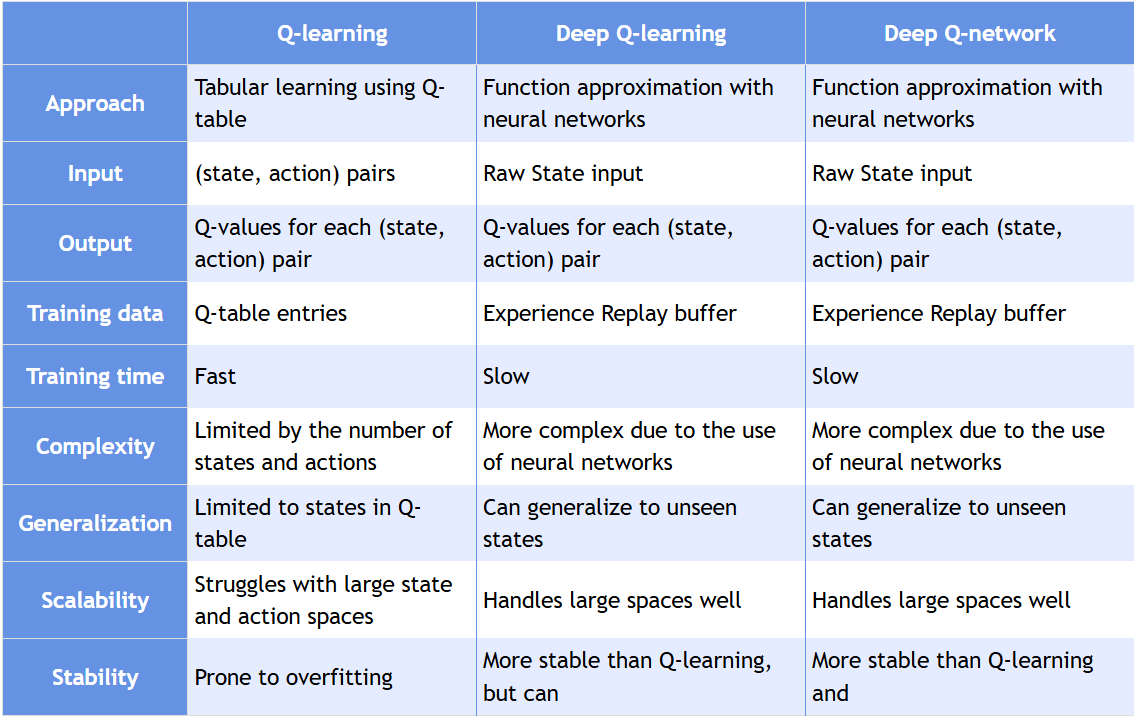

Source of image : https://www.baeldung.com/cs/q-learning-vs-deep-q-learning-vs-deep-q-network

DQN can handles huge inputs but its learning can be unstable:<br>
Each training step, the Q value from the network's latest guess. Every time the weights change, the target number moves.<br>
Game frames come one after another and look almost the same. Gradient descent works best when samples are shuffled and independent, so it gets confused by these near duplicates.<br>
The Bellman update takes the max of noisy Q values, the agent picks numbers that are a bit too high.<br><br>
For each problem there are solutions:<br>
For moving target, the solution is target network is updated slowly<br>
For correlated data, the solution is to save many past steps in memory, then train on small random batches.<br>
For Over optimistic guess, the solution is to use one network to choose the next action and the other to score that action.<br>

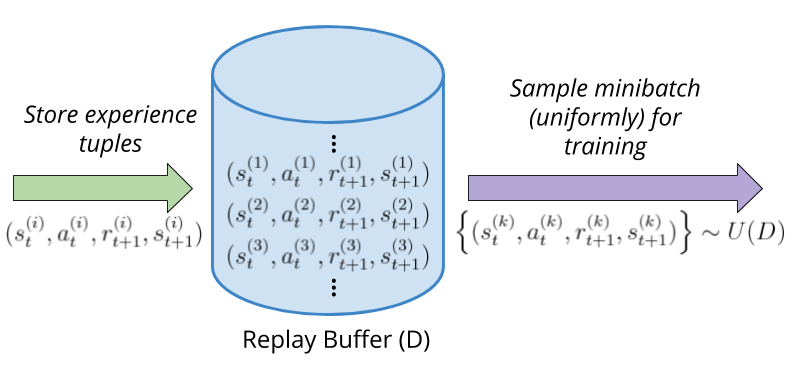<br>
Source of image:https://lazyprogrammer.me/what-is-the-replay-buffer-in-dqn-deep-q-learning/

**Replay Buffer**: stores past experiences (state, action, reward, next state, done) and randomly samples them to stabilize neural network training by breaking data correlation.<bt>
When the agent moves, it writes the experience (s,a,r,s',d) into the buffer.<br>
Instead of always using the latest step, the agent grabs a small random batch of old steps for each training update. With that batch, it calculates target Q values and adjusts the network by gradient descent.<br>
If the replay buffer is full, the oldest experiences are deleted to make space for new ones.<br>

CartPole is my third assignment that teaches a agent how to keep balanced on a moving cart. The rules are very simple: the agent only decides push left or push right.<br> In this game the reward is: how long you stay balanced. Game ends if the pole tilts > 12, cart moves > 2.4 units.